# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
np.random.seed=50
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
appid = weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as er:
        print(er)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | djibo
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | prince george
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | colonia
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | chonchi
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | kataragama
'coord'
City not found. Skipping...
Processing Record 10 of Set 1 | walvis bay
Processing Record 11 of Set 1 | polyarnyy
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | taiohae
'coord'
City not found. Skipping...
Processing Record 14 of Set 1 | altai
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | tura
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | wynyard
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 

'coord'
City not found. Skipping...
Processing Record 37 of Set 4 | nizhneudinsk
Processing Record 38 of Set 4 | barra do corda
Processing Record 39 of Set 4 | stefan voda
Processing Record 40 of Set 4 | kingston
Processing Record 41 of Set 4 | isafjordur
Processing Record 42 of Set 4 | papao
Processing Record 43 of Set 4 | laguna
Processing Record 44 of Set 4 | al jawf
Processing Record 45 of Set 4 | boden
Processing Record 46 of Set 4 | suva
Processing Record 47 of Set 4 | bayburt
Processing Record 48 of Set 4 | okhotsk
Processing Record 49 of Set 4 | port sudan
Processing Record 0 of Set 5 | ribadeo
Processing Record 1 of Set 5 | puerto baquerizo moreno
Processing Record 2 of Set 5 | chunskiy
Processing Record 3 of Set 5 | christchurch
Processing Record 4 of Set 5 | adrar
Processing Record 5 of Set 5 | coquimbo
Processing Record 6 of Set 5 | manicore
Processing Record 7 of Set 5 | avarua
Processing Record 8 of Set 5 | launceston
Processing Record 9 of Set 5 | alenquer
Processing Rec

Processing Record 26 of Set 8 | la paz
Processing Record 27 of Set 8 | hasaki
Processing Record 28 of Set 8 | whitecourt
Processing Record 29 of Set 8 | kurumul
'coord'
City not found. Skipping...
Processing Record 30 of Set 8 | dunafoldvar
Processing Record 31 of Set 8 | fort-shevchenko
Processing Record 32 of Set 8 | huarmey
Processing Record 33 of Set 8 | beau vallon
Processing Record 34 of Set 8 | fort abbas
Processing Record 35 of Set 8 | san fernando
Processing Record 36 of Set 8 | yagry
'coord'
City not found. Skipping...
Processing Record 37 of Set 8 | cumaribo
'coord'
City not found. Skipping...
Processing Record 38 of Set 8 | malango
Processing Record 39 of Set 8 | darende
Processing Record 40 of Set 8 | progreso
Processing Record 41 of Set 8 | cianorte
Processing Record 42 of Set 8 | tazacorte
Processing Record 43 of Set 8 | ujae
Processing Record 44 of Set 8 | port douglas
Processing Record 45 of Set 8 | kruisfontein
Processing Record 46 of Set 8 | aksu
Processing Record 47

Processing Record 13 of Set 12 | mont-dore
Processing Record 14 of Set 12 | palmer
Processing Record 15 of Set 12 | kourou
Processing Record 16 of Set 12 | quartu sant'elena
Processing Record 17 of Set 12 | phalaborwa
Processing Record 18 of Set 12 | mwinilunga
Processing Record 19 of Set 12 | betio village
Processing Record 20 of Set 12 | toga village
'coord'
City not found. Skipping...
Processing Record 21 of Set 12 | laurel bay
Processing Record 22 of Set 12 | banda aceh
Processing Record 23 of Set 12 | sofifi
'coord'
City not found. Skipping...
Processing Record 24 of Set 12 | illizi
Processing Record 25 of Set 12 | blackwater
Processing Record 26 of Set 12 | al bardiyah
Processing Record 27 of Set 12 | el alto
Processing Record 28 of Set 12 | nanping
Processing Record 29 of Set 12 | magadan
Processing Record 30 of Set 12 | holualoa
Processing Record 31 of Set 12 | twin falls
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,djibo,14.1022,-1.6306,29.48,12,2,3.75,BF,1698717342
1,bredasdorp,-34.5322,20.0403,13.49,78,0,5.41,ZA,1698717342
2,prince george,53.9166,-122.7530,0.69,62,0,1.03,CA,1698717343
3,albany,42.6001,-73.9662,6.31,81,100,0.45,US,1698717343
4,colonia,50.9333,6.9500,11.65,86,100,7.72,DE,1698717280


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,djibo,14.1022,-1.6306,29.48,12,2,3.75,BF,1698717342
1,bredasdorp,-34.5322,20.0403,13.49,78,0,5.41,ZA,1698717342
2,prince george,53.9166,-122.7530,0.69,62,0,1.03,CA,1698717343
3,albany,42.6001,-73.9662,6.31,81,100,0.45,US,1698717343
4,colonia,50.9333,6.9500,11.65,86,100,7.72,DE,1698717280


In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,djibo,14.1022,-1.6306,29.48,12,2,3.75,BF,1698717342
1,bredasdorp,-34.5322,20.0403,13.49,78,0,5.41,ZA,1698717342
2,prince george,53.9166,-122.7530,0.69,62,0,1.03,CA,1698717343
3,albany,42.6001,-73.9662,6.31,81,100,0.45,US,1698717343
4,colonia,50.9333,6.9500,11.65,86,100,7.72,DE,1698717280


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

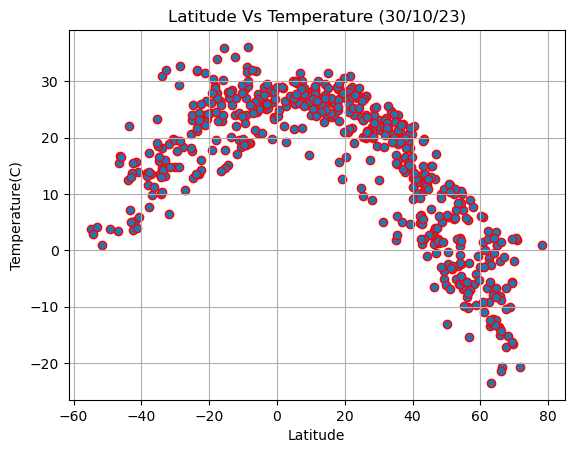

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor='red')

# Incorporate the other graph properties
plt.title("Latitude Vs Temperature (%s)" % time.strftime("%d/%m/%y"))
plt.xlabel("Latitude")
plt.ylabel("Temperature(C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

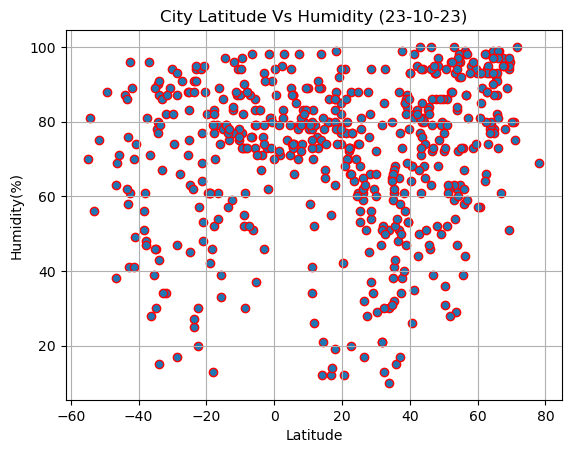

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor='red')

# Incorporate the other graph properties
plt.title("City Latitude Vs Humidity (%s)" % time.strftime("%y-%m-%y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

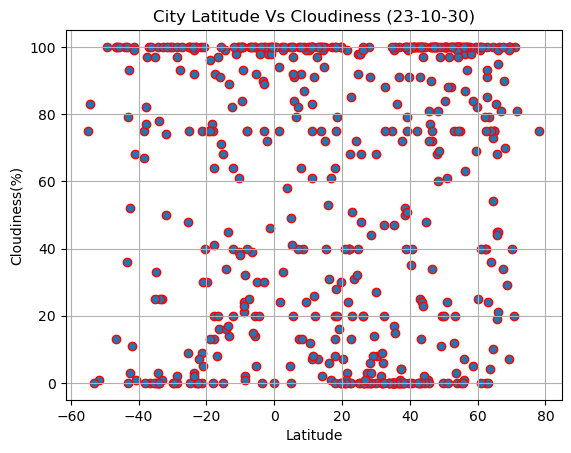

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor='red')

# Incorporate the other graph properties
plt.title("City Latitude Vs Cloudiness (%s)" % time.strftime("%y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

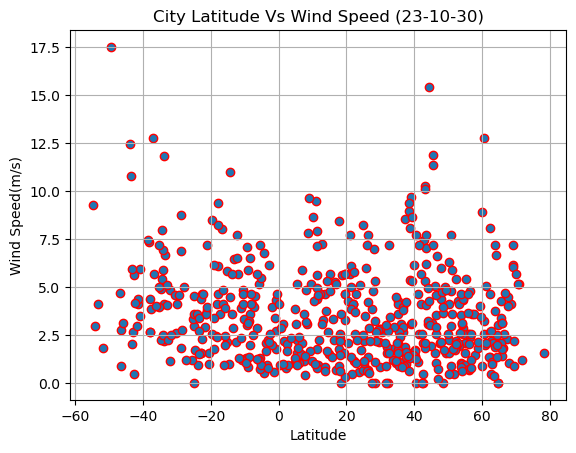

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor='red')

# Incorporate the other graph properties
plt.title("City Latitude Vs Wind Speed (%s)" % time.strftime("%y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue,stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="blue")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.show()
    
    print(f"The r-value is: {rvalue**2}")

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,djibo,14.1022,-1.6306,29.48,12,2,3.75,BF,1698717342
2,prince george,53.9166,-122.7530,0.69,62,0,1.03,CA,1698717343
3,albany,42.6001,-73.9662,6.31,81,100,0.45,US,1698717343
4,colonia,50.9333,6.9500,11.65,86,100,7.72,DE,1698717280
5,olonkinbyen,70.9221,-8.7187,1.80,75,100,5.14,SJ,1698717131


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,13.49,78,0,5.41,ZA,1698717342
6,chonchi,-42.6128,-73.8092,3.56,96,3,0.49,CL,1698717343
8,walvis bay,-22.9575,14.5053,13.53,94,0,1.54,NaN,1698717151
12,waitangi,-43.9535,-176.5597,12.49,87,100,12.48,NZ,1698717128
14,edinburgh of the seven seas,-37.0676,-12.3116,13.45,96,100,12.76,SH,1698717344


###  Temperature vs. Latitude Linear Regression Plot

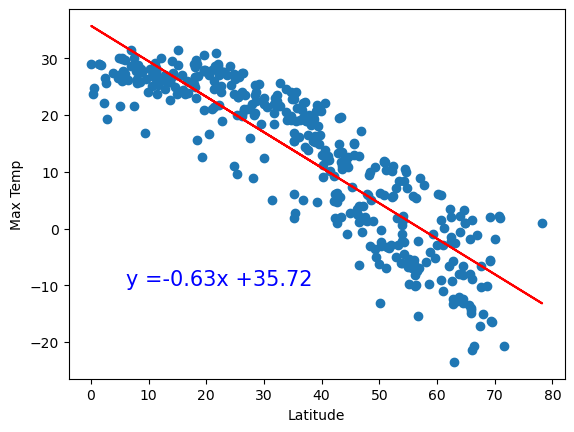

The r-value is: 0.7808214702203801


In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6, -10))

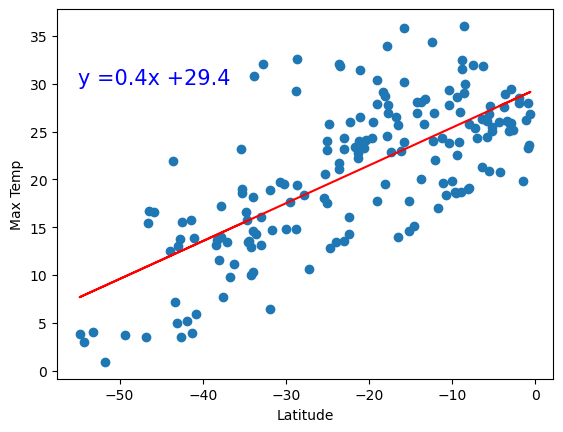

The r-value is: 0.5085615377398137


In [20]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 30))

**Discussion about the linear relationship:** Correlation between Latitude and Maximum temperature in Northern hamisphere is negative and in Southern hamisphere is positive but the pearson correlation is stronger (0.78) in northern hamisphere than Southern hamisphere(0.51). 

### Humidity vs. Latitude Linear Regression Plot

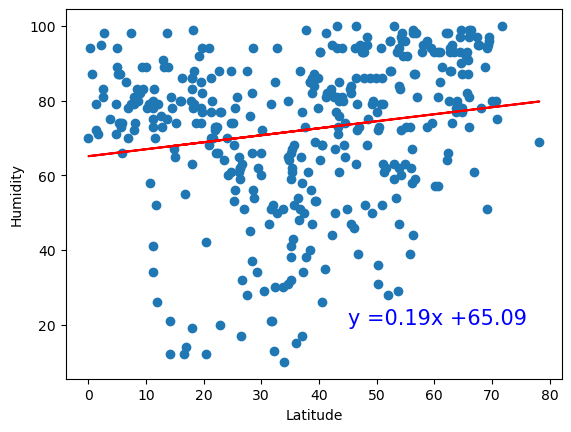

The r-value is: 0.030803949359074913


In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (45, 20))

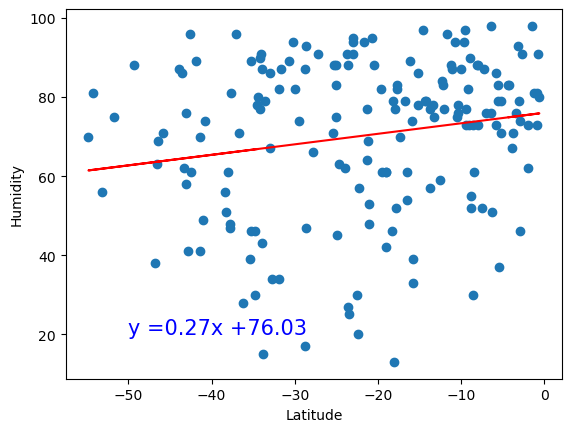

The r-value is: 0.03467040679395637


In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

**Discussion about the linear relationship:** Correlation between Latitude and Humidity in Northern hamisphere  and Southern hamisphere is almost same, even the pearson correlation is also same in northern hamisphere (0.03) and Southern hamisphere(0.03) that are very poor correlation.

### Cloudiness vs. Latitude Linear Regression Plot

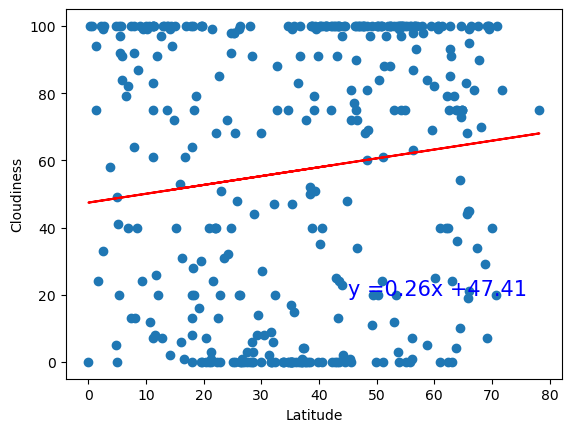

The r-value is: 0.015449463497049842


In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (45, 20))

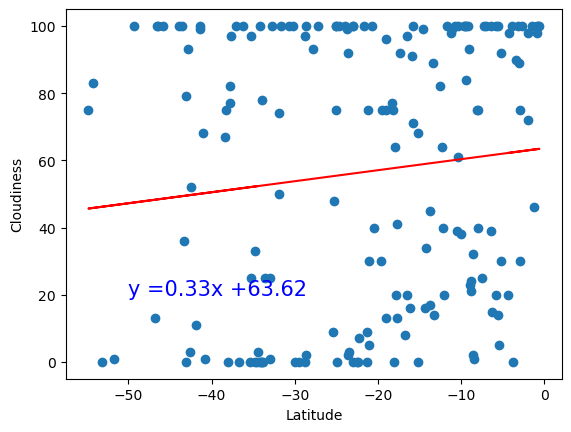

The r-value is: 0.012735932474132376


In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-50, 20))

**Discussion about the linear relationship:** Correlation between Latitude and Cloudiness in Northern hamisphere  and Southern hamisphere is also almost same and the pearson correlation is also very poor in both northern hamisphere (0.01) and Southern hamisphere(0.01).

### Wind Speed vs. Latitude Linear Regression Plot

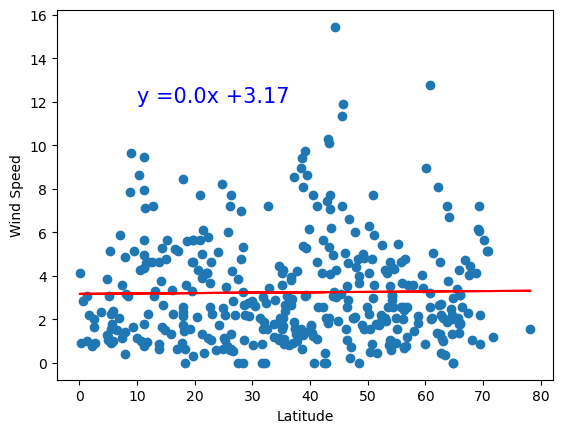

The r-value is: 0.00020810574807849508


In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (10, 12))

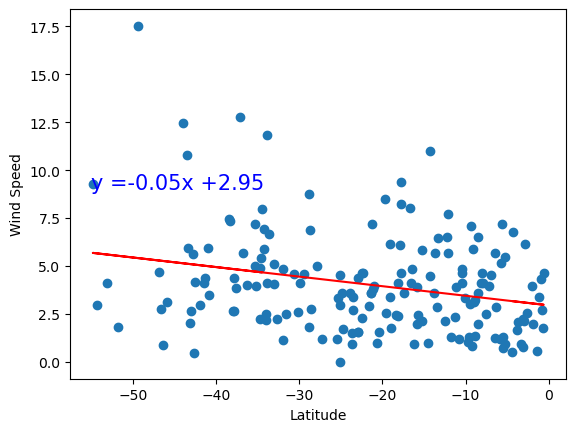

The r-value is: 0.06843885335657451


In [26]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-55, 9))

**Discussion about the linear relationship:** In Northern hamisphere, the linear regression is flat, so cannot tell about the correlation between Latitude and Wind speed  and Southern hamisphere is having negative correlation.The pearson correlation in northern hamisphere is very poor(0.0002) and in Southern hamisphere(0.06) is also not having good correlation.